In [1]:
import sys
sys.path.append('../../')

In [5]:
import numpy as np
from neuron import h
from pybrep.pop_generation.ebeida import ebeida_sampling
from pybrep.pop_generation.bridson import Bridson_sampling_2d
from pybrep.pop_generation.utils import PointCloud
import matplotlib.pyplot as plt

In [32]:
h.load_file("../../test/set3005/Parameters.hoc")
h.MFxrange = 200
h.MFyrange = 200
h.GLdepth += 50

def compute_mf_params(h):
    Transverse_range = h.MFyrange
    Horizontal_range = h.MFxrange
    Vertical_range = h.GLdepth
    Volume = Transverse_range * Horizontal_range * Vertical_range

    MFdensity = h.MFdensity

    box_fac = 2.5
    Xinstantiate = 64 + 40  # 297+40
    Yinstantiate = 84 + 40 * box_fac  # 474+40x*box_fac

    n_mf = int(
        (Transverse_range + (2 * Xinstantiate))
        * (Horizontal_range + (2 * Yinstantiate))
        * MFdensity
        * 1e-6
    )
    print("N MF = {}".format(n_mf))
    return (
        (Horizontal_range + (2 * Yinstantiate), Transverse_range + (2 * Xinstantiate)),
        n_mf,
    )


mf_box, n_mf = compute_mf_params(h)
mf_box = (200, 200)

N MF = 382


In [60]:
spacing_mf = 20

mf_points = ebeida_sampling(mf_box, spacing_mf, n_mf+500, True)
# mf_points = Bridson_sampling_2d(mf_box, spacing_mf, 82, True)

# mf_points = mf_points + np.random.randn(mf_points.shape[0], mf_points.shape[1])*0

ndim 2
dlat dim (8,)
s_cell dim (225, 2)


ndarts = 45
Rejection_rate:  0.3111111111111111
new points: 31 / 882 194/225
ndarts = 39
Rejection_rate:  0.717948717948718
new points: 42 / 882 183/225
ndarts = 37
Rejection_rate:  0.8648648648648649
new points: 47 / 882 178/225
ndarts = 36
Rejection_rate:  0.8333333333333334
new points: 53 / 882 172/225
ndarts = 34
Rejection_rate:  0.9117647058823529
new points: 56 / 882 169/225
ndarts = 34
Rejection_rate:  0.8823529411764706
new points: 60 / 882 165/225
ndarts = 33
Rejection_rate:  0.9090909090909091
new points: 63 / 882 162/225
ndarts = 32
Rejection_rate:  0.90625
new points: 66 / 882 159/225
ndarts = 32
Rejection_rate:  0.96875
new points: 67 / 882 158/225
Splitting cells...
Number of new cells = 632
Testing coverage of cells...with my points
0.0003037452697753906
0.10398316383361816
ntest:  67
0.005357027053833008
Uncovered cells: 99.99925373691241%

ndarts = 27
Rejection_rate:  0.8888888888888888
new points: 70 / 882 126/134
ndarts = 25
Rejection_rate:  0.92
new points: 72 / 882

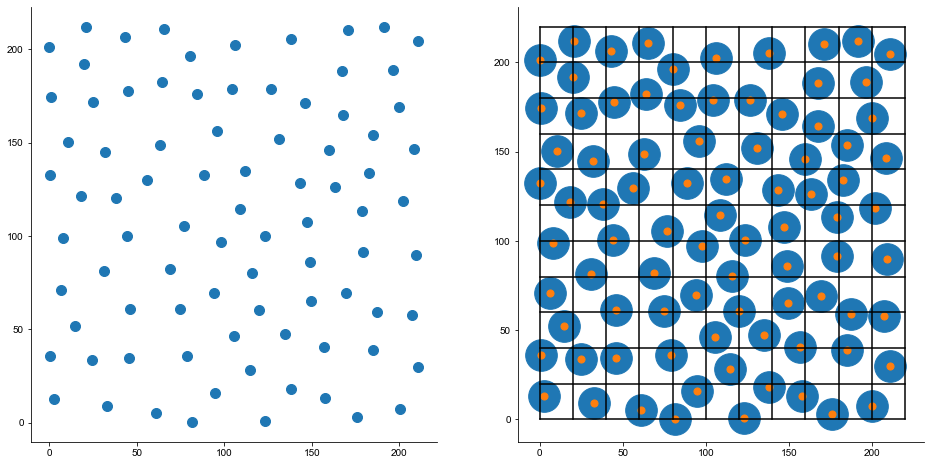

In [72]:
x = mf_points
_, ax = plt.subplots(ncols=2, figsize=(16,8))

ax[0].scatter(x[:,0], x[:,1], 100)

ax[1].scatter(x[:,0], x[:,1], 1000)
ax[1].scatter(x[:,0], x[:,1], 50)

for i in range(12):
    ax[1].plot([0, h.MFxrange+20], [20*i, 20*i], 'k')
for i in range(12):
    ax[1].plot([20*i, 20*i], [0, h.MFyrange+20], 'k')

